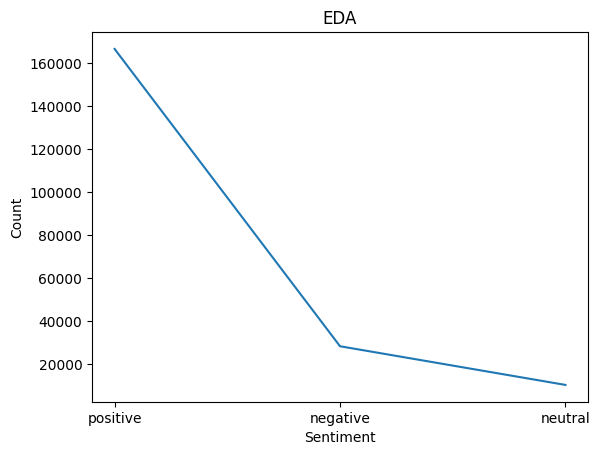

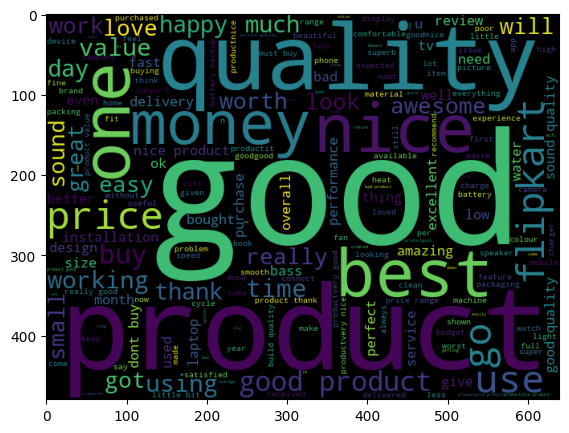

In [1]:
import pandas
import numpy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

df=pandas.read_csv(r'D:\project\mini project\archive\Dataset-SA.csv')
df.head()                           

sentiment_count=df['Sentiment'].value_counts()
plt.plot(sentiment_count.index,sentiment_count.values)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("EDA")

from wordcloud import WordCloud
text=''.join(df['Summary'].dropna())
wc=WordCloud(width=640,height=480,background_color='black').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc)

In [6]:
df=df.sample(n=50000)
x=df['Summary'].fillna("")
y=df['Sentiment'].fillna("")
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

vec=CountVectorizer()
X_train=vec.fit_transform(x_train)
X_test=vec.transform(x_test)

from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
Y_train=enc.fit_transform(y_train)
Y_test=enc.transform(y_test)

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
print(rfc.predict(vec.transform(["hey i love this product"])))
print(rfc.predict(vec.transform(["the product is not good"])))

['positive']
['negative']


In [ ]:
import pickle
rfc_model=pickle.dumps(rfc)

In [17]:
tm=pickle.loads(rfc_model)
tm.predict(vec.transform(["this is awesome"]))

array(['positive'], dtype=object)